In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, gaussian_kde


retail_data = pd.read_csv('../Datasets/Retail_Store_data.csv')

retail_data

# Note:
# Customers are 15 customers per hour


,Customer_ID,Purchase_Amount,Visit_Duration,Items_Purchased,Store_Section,Weekday
0,1,174.835708,28.423084,2,Groceries,Tuesday
1,2,143.086785,21.502462,7,Electronics,Sunday
2,3,182.384427,80.007327,5,Apparel,Saturday
3,4,226.151493,87.712330,5,Groceries,Saturday
4,5,138.292331,13.474476,8,Groceries,Tuesday
...,...,...,...,...,...,...
995,996,135.944985,40.875154,5,Electronics,Saturday
996,997,239.884326,32.769184,2,Electronics,Thursday
997,998,182.042143,66.822989,2,Apparel,Wednesday
998,999,121.441051,10.605638,5,Apparel,Saturday


In [2]:
retail_data['Customer_ID'].unique().shape

(1000,)

In [3]:
retail_data.isnull().sum()

Customer_ID        0
Purchase_Amount    0
Visit_Duration     0
Items_Purchased    0
Store_Section      0
Weekday            0
dtype: int64

In [4]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_ID      1000 non-null   int64  
 1   Purchase_Amount  1000 non-null   float64
 2   Visit_Duration   1000 non-null   float64
 3   Items_Purchased  1000 non-null   int64  
 4   Store_Section    1000 non-null   object 
 5   Weekday          1000 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB


## Poisson Distribution

[18 17 11 17 15 15  8 17 16]


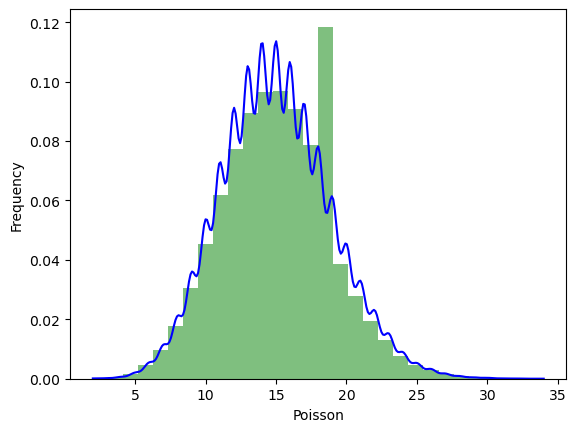

In [12]:
# Generate Poisson distributed data
data_poisson = poisson.rvs(mu=15, size=100_000)
print(data_poisson[0:9])

# Plot histogram
plt.hist(data_poisson, bins=30, density=True, alpha=0.5, color='green')


# Calculate the KDE
kde = gaussian_kde(data_poisson)
kde_xs = np.linspace(data_poisson.min(), data_poisson.max(), 301)
kde_ys = kde.pdf(kde_xs)

# Plot KDE
plt.plot(kde_xs, kde_ys, color='blue')

# Add labels
plt.xlabel('Poisson')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [6]:
visits_per_day = retail_data['Weekday'].value_counts()
visits_per_day

Weekday
Friday       154
Saturday     153
Thursday     147
Monday       143
Sunday       137
Wednesday    136
Tuesday      130
Name: count, dtype: int64

In [7]:
visits_per_hour = visits_per_day/8 #Divide by 8 hours that the business might be opened
visits_per_hour

Weekday
Friday       19.250
Saturday     19.125
Thursday     18.375
Monday       17.875
Sunday       17.125
Wednesday    17.000
Tuesday      16.250
Name: count, dtype: float64

## Normal Distribution

We want to know if the data Purchase_Amount follows a normal distribution.
How do we discover that?
We plot the data!

In [8]:
purchase_amount = retail_data['Purchase_Amount']
purchase_amount

0      174.835708
1      143.086785
2      182.384427
3      226.151493
4      138.292331
          ...    
995    135.944985
996    239.884326
997    182.042143
998    121.441051
999    178.629139
Name: Purchase_Amount, Length: 1000, dtype: float64

In [9]:
purchase_amount.describe()

count    1000.000000
mean      150.966603
std        48.960797
min       -12.063367
25%       117.620485
50%       151.265031
75%       182.397194
max       342.636575
Name: Purchase_Amount, dtype: float64

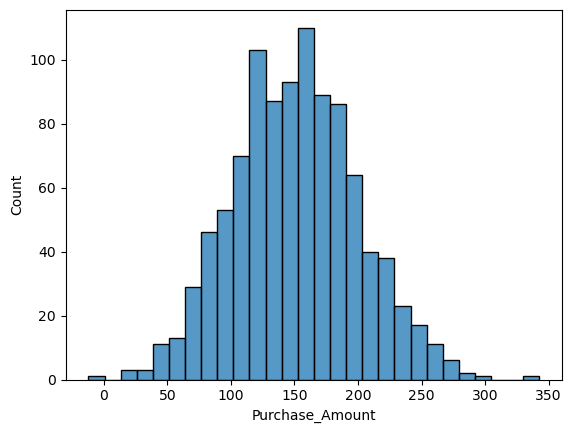

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.histplot(purchase_amount)
# sns.histplot(purchase_amount,kde=True)
sns.histplot(retail_data, x='Purchase_Amount')

# # Calculate the KDE
# kde = gaussian_kde(purchase_amount)
# kde_xs = np.linspace(purchase_amount.min(), purchase_amount.max(), 301)
# kde_ys = kde.pdf(kde_xs)
# # Plot KDE
# sns.lineplot(kde_xs, kde_ys, color='blue')


plt.show()


## More indicators
We can also take a look at other indicators li

In [ ]:
purchase_amount.skew()

0.11697636882001321

In [ ]:
purchase_amount.kurt()

0.07256220235414812

The Shapiro-Wilk test checks for normality. If the p-value is greater than 0.05 (α = 0.05), we assume normality.

In [ ]:
from scipy.stats import shapiro


# Perform Shapiro-Wilk test for normality

result = shapiro(purchase_amount)

print(f"Shapiro-Wilk test: p-value = {result.pvalue:.6f}")


Shapiro-Wilk test: p-value = 0.626924
